---

title: "K-means 算法讲解"
date: 2024-07-06
author: 郝鸿涛
slug: k-means
draft: false
toc: true
tags: ML

---

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation, FFMpegWriter

## 算法讲解

K-means 的作用是将数据分类。下面我们用最简单的例子来举例，然后一步步手动写出该算法 (不调用出 pandas, numpy 和 matploblib 之外的任何包)。

下面我们有 200 个随机的二维数据点：

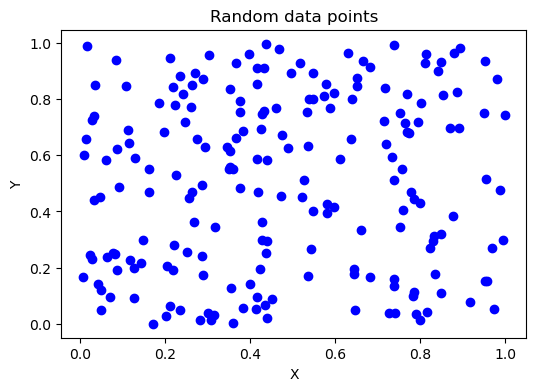

In [2]:
data = np.random.rand(200, 2)
plt.figure(figsize=(6,4))
plt.scatter(data[:, 0], data[:, 1], c="blue", marker="o")
plt.title("Random data points")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

我们的任务是将上面的 200 个点划分为 $k$ 类。K-means 的算法步骤为下：
1. 随机选取 $k$ 个点作为最初始的中心点 (centroid)
2. 对 200 个点中的每个点 $i$，计算该点与每个中心点 (centroid) 的距离。如果距离第一个中心点最近，那 $i$ 归为第一类，以此类推。
3. 对每一个类中的所有点，取平均值，得到新的 $k$ 个中心点。
4. 重复第二步与第三步，直到中心点无法继续更新（或者满足你自定义的条件，比如，新的中心点与之前的距离非常近）

## 写初步代码

下面，我们按照上面的步骤简单写一下 K-means。

In [3]:
# 数据维度，我们这里是二维的，也就是只有 x, y
n = 2
# 将数据分为多少个类
k = 2
# 最初的随机中心点
initial_centroids = np.random.rand(k, n)
# 初始化 clusters。clusters 为一个 list，该 list 包含 k 个子 list。每个子 list 是一个类
# 其里面的元素为划为该类的数据点
clusters = [[] for _ in range(k)]
# 对于每一个点
for d in data:
    # 计算该点与每一个中心点的距离
    distances = [np.linalg.norm(d - initial_centroids[c]) for c in range(k)]
    # 看看距离哪一个中心点更近
    min_distances_idx = np.argmin(distances)
    # 将该点放进距离较近的中心点 (centroid) 所在的类别 (cluster)
    clusters[min_distances_idx].append(d)
# 更新了 clusters  之后，我们继续更新 centroids。此时，两个 centroids 分别是各自所在 cluster 的中心，
# 也就是 mean
# axis = 0, by column
updated_centroids = np.array([np.mean(clusters[c], axis = 0) for c in range(k)])

好，我们已经更新了 clusters 和 centroids，让我们来看看现在的情况如何：

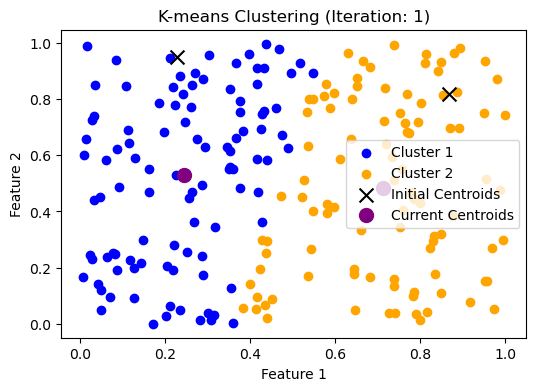

In [4]:
colors = ['b', 'orange', 'g', 'r', 'y', 'c', 'm']
plt.figure(figsize = (6, 4))
for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], c = colors[i], label=f"Cluster {i+1}")
plt.scatter(
    initial_centroids[:, 0], 
    initial_centroids[:, 1],
    c='k',
    marker='x',
    s = 100,
    label="Initial Centroids"
)
plt.scatter(
    updated_centroids[:, 0], 
    updated_centroids[:, 1],
    c='purple',
    marker='o',
    s = 100,
    label="Current Centroids"
)
plt.title("K-means Clustering (Iteration: 1)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


我们继续：

In [5]:
# 需要重新初始化 clusters
clusters = [[] for _ in range(k)]
# 对于每一个点
for d in data:
    # 计算该点与每一个中心点的距离
    distances = [np.linalg.norm(d - updated_centroids[c]) for c in range(k)]
    # 看看距离哪一个中心点更近
    min_distances_idx = np.argmin(distances)
    # 将该点放进距离较近的中心点 (centroid) 所在的类别 (cluster)
    clusters[min_distances_idx].append(d)
# 更新了 clusters  之后，我们继续更新 centroids。此时，两个 centroids 分别是各自所在 cluster 的中心，
# 也就是 mean
# axis = 0, by column
updated_centroids = np.array([np.mean(clusters[c], axis = 0) for c in range(k)])

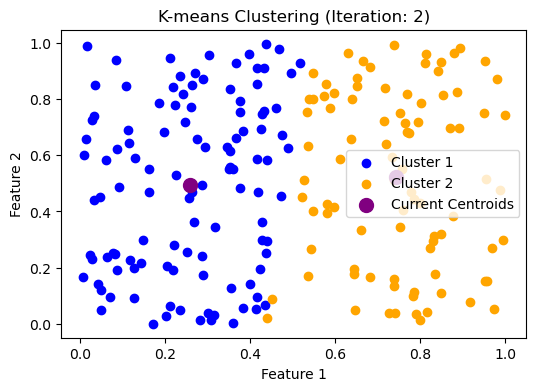

In [6]:
colors = ['b', 'orange', 'g', 'r', 'y', 'c', 'm']
plt.figure(figsize = (6, 4))
for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], c = colors[i], label=f"Cluster {i+1}")
plt.scatter(
    updated_centroids[:, 0], 
    updated_centroids[:, 1],
    c='purple',
    marker='o',
    s = 100,
    label="Current Centroids"
)
plt.title("K-means Clustering (Iteration: 2)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

好，我们就不继续一步步做了。上面代码的问题是，每一步都需要重新写代码，这样不行。我们需要实现自动化。

## 普适性代码

In [7]:
def kmeans_clustering(data, centroids):
    """
    Inputs:
      - data: data points to cluster 
      - centroids: previous centroids
    
    Outputs:
      - updated_centoids:
      - clusters: a list. 
        Each list contains all arrays which are data points classified into this cluster
    """
    # num of clusters
    k = len(centroids)
    # initialize empty clusters
    clusters = [[] for _ in range(k)]
    # for each data point
    for d in data:
        # calcuate distance from each centroid to this data point
        distances = [np.linalg.norm(d - centroids[c]) for c in range(k)]
        # the index of centroid that is the closest to this data point
        min_distance_idx = np.argmin(distances)
        # add this data point to the associated cluster
        clusters[min_distance_idx].append(d)
    # update centroids by calculating mean of each cluster
    updated_centroids = np.array([np.mean(clusters[c], axis = 0) for c in range(k)])
    return updated_centroids, clusters

In [8]:
def make_plot(clusters, centroids, iteration):
    # Plotting the results
    colors = ['b', 'g', 'r', 'y', 'c', 'm']
    plt.figure(figsize=(6, 4))
    for i, cluster in enumerate(clusters):
        cluster = np.array(cluster)
        if len(cluster) > 0:
            plt.scatter(cluster[:, 0], cluster[:, 1], 
                        c=colors[i], label=f'Cluster {i+1}')

    # plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], c='k', marker='x', s=100, label='Initial Centroids')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='k', 
                marker='o', s=100, label='Centroids')
    plt.title(f'K-means Clustering (Iteration: {iteration})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

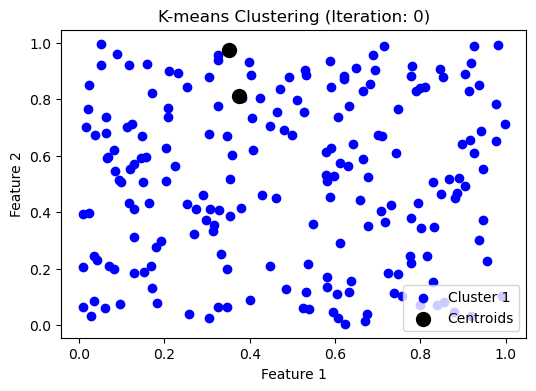

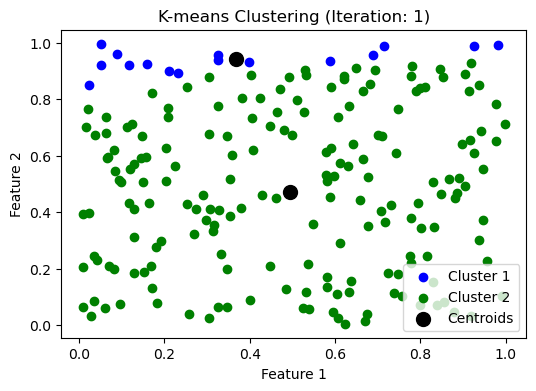

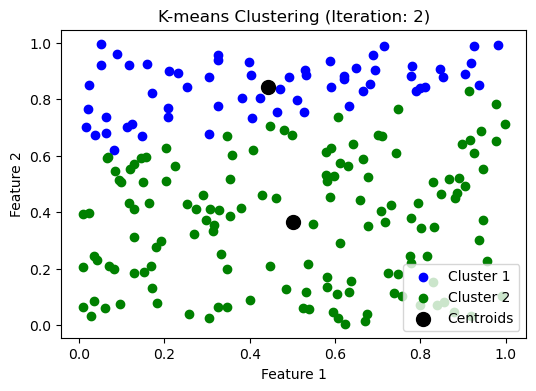

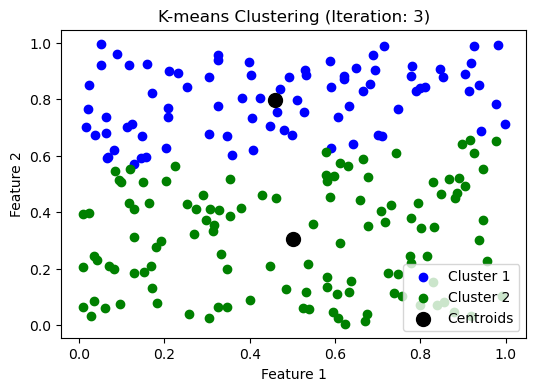

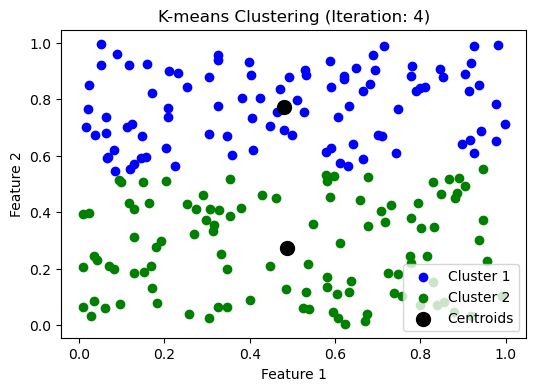

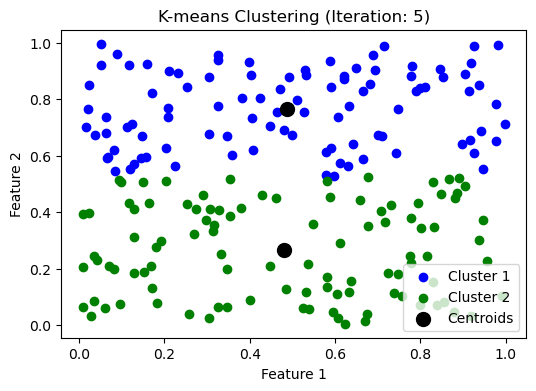

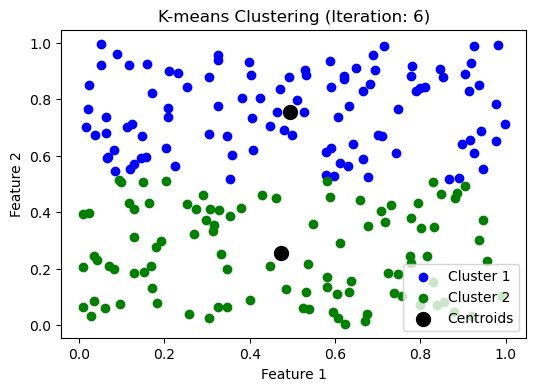

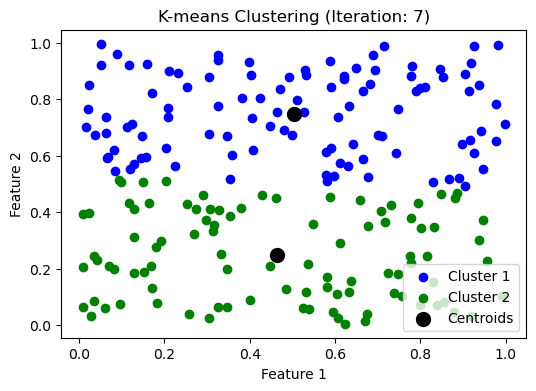

In [9]:
# num of dimensions
n = 2
# num of clusters
k = 2
# Convergence criteria
threshold = 1e-2
# generate random data 
data = np.random.rand(200, n)
# random centroids as an initial stage; a k by n matrix
initial_centroids = np.random.rand(k, n) 
# update centroids and clusters using our previous function
updated_centroids, clusters = kmeans_clustering(data, initial_centroids)
# num of iterations
iteration = 0
centroids = initial_centroids
# plot the initial state
make_plot([data], centroids, iteration)

# np.max(np.linalg.norm(updated_centroids - centroids, axis=1))
# this calculates the max shift among centroid shifts
while np.max(np.linalg.norm(updated_centroids - centroids, axis=1)) > threshold:
    iteration += 1
    make_plot(clusters, updated_centroids, iteration)
    # updated centroids 
    centroids = updated_centroids
    updated_centroids, clusters = kmeans_clustering(data, centroids)

## 制作动画

上面的代码我们可以把每一步画出来，我们试试制作一个动画。

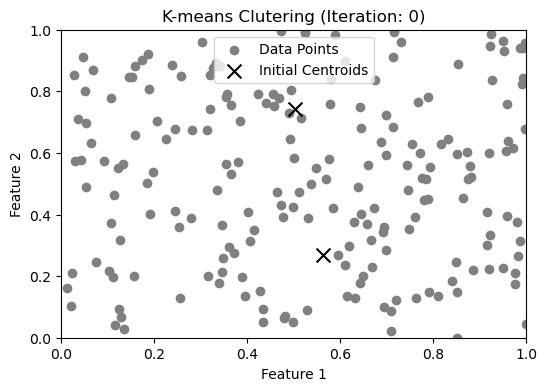

In [10]:
fig, ax = plt.subplots(figsize = (6, 4))
# Convergence criteria
threshold = 1e-3
# generate random data 
data = np.random.rand(200, n)
# random centroids as an initial stage; a k by n matrix
initial_centroids = np.random.rand(k, n) 
centroids = initial_centroids.copy()

def update(frame):
    global centroids
    ax.clear()
    ax.set_title(f"K-means Clutering (Iteration: {frame})")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)

    # plot nitial stage where there are two random centroids
    if frame == 0:
        ax.scatter(data[:, 0], data[:, 1], c="gray", label="Data Points")
        ax.scatter(centroids[:, 0], centroids[:, 1],
                   c='k', marker='x', s=100, label='Initial Centroids'
        )
        ax.legend()
        return
    
    # update centroids and clusters using our previous function
    updated_centroids, clusters = kmeans_clustering(data, centroids)

    # make plot
    colors = ['b', 'g', 'r', 'y', 'c', 'm']
    for j, cluster in enumerate(clusters):
        cluster = np.array(cluster)
        if len(cluster) > 0:
            ax.scatter(cluster[:, 0], cluster[:, 1], c=colors[j % len(colors)], label=f'Cluster {j+1}')
    # plot centroids
    ax.scatter(updated_centroids[:, 0], updated_centroids[:, 1], c='k', 
                marker='o', s=100, label='Centroids')
    ax.legend()

    # Check for convergence
    max_centroid_change = np.max(np.linalg.norm(updated_centroids - centroids, axis=1))
    if max_centroid_change < threshold:
        anim.event_source.stop()
        return

    # Update centroids
    centroids = updated_centroids

# Create the animation
anim = FuncAnimation(fig, update, frames=np.arange(20), interval=1000, repeat=False)

writer = FFMpegWriter(fps=1)  # Adjust fps as needed
anim.save("img/kmeans_clustering.mp4", writer=writer)

# Show the animation
# plt.show()